# IMDB using LSTMs

In [1]:
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

2023-06-19 10:02:23.086234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 [==============================] - 2s 0us/step


## Examining the dataset

In [2]:
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

# print first 2 to show that it is already tokenised
print(X[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825




Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Unique
88585



Review length: 

Mean 234.76 words (172.911495)






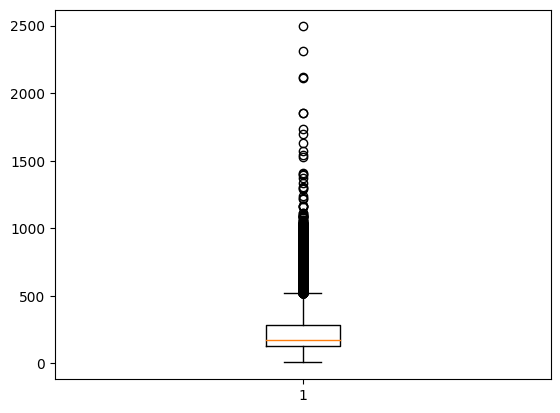

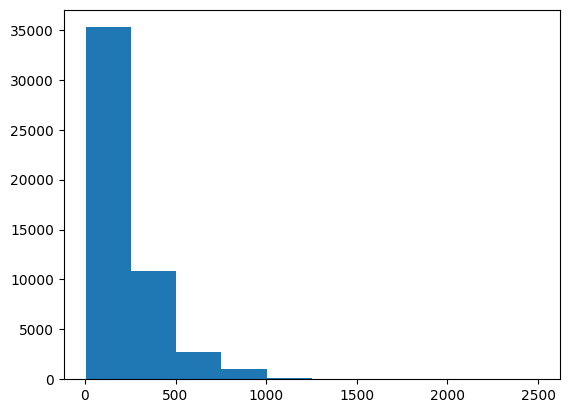

In [3]:
# summarize size
print("\n\n\nTraining data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

print("Unique")
print(len(numpy.unique(numpy.hstack(X))))

# Summarize review length
print("\n\n\nReview length: ")
result = [len(x) for x in X]
print("\nMean %.2f words (%f)\n\n\n\n" % (numpy.mean(result), numpy.std(result)))

plt.boxplot(result)
plt.show()

plt.hist(result)
plt.show()

## Using a DANN

In [4]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [6]:
# create the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=500))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

2023-06-19 10:02:34.415098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 10:02:34.420921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 10:02:34.421277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 10:02:34.423108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 10:02:34.423353: I tensorflow/compile

Epoch 1/4


2023-06-19 10:02:36.254386: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f273c011c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-19 10:02:36.254430: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-06-19 10:02:36.259868: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-19 10:02:36.402956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-19 10:02:36.519229: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 [==============================] - 22s 106ms/step - loss: 0.5409 - acc: 0.6936 - val_loss: 0.3096 - val_acc: 0.8674
Epoch 2/4
196/196 [==============================] - 11s 58ms/step - loss: 0.2044 - acc: 0.9202 - val_loss: 0.3327 - val_acc: 0.8591
Epoch 3/4
196/196 [==============================] - 8s 40ms/step - loss: 0.0700 - acc: 0.9782 - val_loss: 0.3901 - val_acc: 0.8631
Epoch 4/4
196/196 [==============================] - 6s 29ms/step - loss: 0.0136 - acc: 0.9976 - val_loss: 0.4930 - val_acc: 0.8627
Accuracy: 86.27%


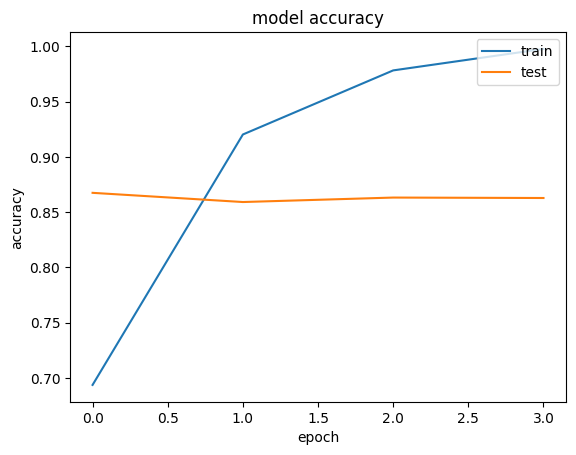

In [7]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## ID CNN

In [8]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D


# create the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=500))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Epoch 1/4
196/196 [==============================] - 18s 81ms/step - loss: 0.4642 - acc: 0.7443 - val_loss: 0.2760 - val_acc: 0.8852
Epoch 2/4
196/196 [==============================] - 9s 46ms/step - loss: 0.2189 - acc: 0.9134 - val_loss: 0.2729 - val_acc: 0.8870
Epoch 3/4
196/196 [==============================] - 7s 33ms/step - loss: 0.1560 - acc: 0.9414 - val_loss: 0.3006 - val_acc: 0.8820
Epoch 4/4
196/196 [==============================] - 5s 25ms/step - loss: 0.0987 - acc: 0.9687 - val_loss: 0.3485 - val_acc: 0.8756
Accuracy: 87.56%


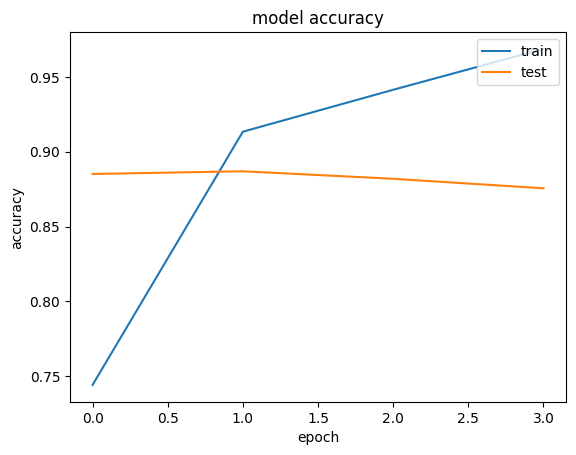

In [9]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## LSTM

In [10]:
from keras.layers import Dense, Embedding
from keras.layers import LSTM


# create the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=500))
model.add(LSTM(128))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

2023-06-19 10:04:04.947677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 10:04:04.949286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 10:04:04.950569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/4


2023-06-19 10:04:05.196382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 10:04:05.197874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 10:04:05.199274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

196/196 [==============================] - ETA: 0s - loss: 0.5153 - acc: 0.7398

2023-06-19 10:04:26.722203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 10:04:26.724230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 10:04:26.725237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

196/196 [==============================] - 25s 118ms/step - loss: 0.5153 - acc: 0.7398 - val_loss: 0.3745 - val_acc: 0.8334
Epoch 2/4
196/196 [==============================] - 16s 80ms/step - loss: 0.3068 - acc: 0.8750 - val_loss: 0.3211 - val_acc: 0.8738
Epoch 3/4
196/196 [==============================] - 13s 67ms/step - loss: 0.2458 - acc: 0.9024 - val_loss: 0.3078 - val_acc: 0.8749
Epoch 4/4
196/196 [==============================] - 12s 59ms/step - loss: 0.2155 - acc: 0.9174 - val_loss: 0.3156 - val_acc: 0.8708
Accuracy: 87.08%


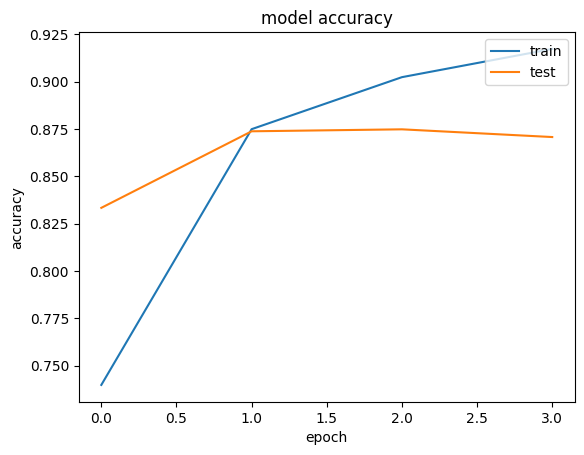

In [11]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()